## Weather Data Collection Using OpenWeatherMap API

This Jupyter Notebook script collects weather data for a given list of cities using the OpenWeatherMap API and processes it into a structured format. The weather data includes key metrics like temperature, humidity, precipitation, and wind speed.

The below data is collected from OpenWeatherMap API. It collects weather data data for each day (current day). The idea behind the project is to run this python script for for few days to collect the latest weather data of each day and then perform exploratory data analysis to understand the weather across multiple cities in the world for the month of November.

The script has been run from the date ***11-11-2024 to 20-11-2024*** and the data is saved in multiple csv files. Though the collected data is not huge but its an attempt to draw some conclussion out of it.

### Variables

Here is the list of variables that are being retrieved to store the information.

- date
- City name
- timezone
- Temperature (°C)
- Temperature (°F)
- feels_like (°C)
- Humidity (%)
- precipitation (mm)
- Weather
- Wind Speed (m/s)
 

In [1]:
import pandas as pd
import requests
from datetime import datetime

# List of cities
cities = ["New York", "London", "Paris", "Tokyo", "Delhi", "Seattle", "USA River", "Mumbai", "Kabul", "Las Vegas", "Bristol", "Kolkata", "Chicago", "Glasgow", "Amsterdam", "Madrid", "Berlin", "Rome", "Vienna", "Barcelona", "Florence", "Milan", "IStanbul", "Tokyo", "Dubai", "Seoul", "Kyoto", "Johannesburg", "Lagos", "Ciaro", "Nairobi","Kharghar"]
api_key = "c83312b7bc730c52cbb6bd54d1e13a80"        #API key for OpenWeatherMap is stored

# Define an empty list to store data
weather_data = []

def get_weather(api_key, city):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        temp_kelvin = data['main']['temp']
        temp_celsius = temp_kelvin - 273.15
        temp_fahrenheit = temp_celsius * 9/5 + 32

        # Features
        weather_data.append({
            "Date": datetime.now().strftime("%Y-%m-%d"),
            "City": data['name'],
            "country": data['sys']['country'],
            "timezone": data['timezone'],
            "Temperature (°C)": round(temp_celsius, 2),
            "Temperature (°F)": round(temp_fahrenheit, 2),
            "feels_like (°C)": round(data['main']['feels_like']-273.15,2),
            "Humidity (%)": data['main']['humidity'],
            "precipitation (mm)": data.get('rain', {}).get('1h', 0),
            "Weather": data['weather'][0]['description'].capitalize(),
            "Wind Speed (m/s)": data['wind']['speed'],
            "Weather": data['weather'][0]['description'].capitalize()
        })
    else:
        print(f"Failed to retrieve data for {city}")

# Fetch weather data for each city
for city in cities:
    get_weather(api_key, city)

# Create a DataFrame from the list
df = pd.DataFrame(weather_data)
print(df)

# Append the DataFrame to a CSV file
with open('weather_data.csv', 'a') as f:
    df.to_csv(f, header=f.tell()==0, index=False)
print("Data appended to weather_data.csv")



          Date          City country  timezone  Temperature (°C)  \
0   2024-11-21      New York      US    -18000              6.13   
1   2024-11-21        London      GB         0              0.52   
2   2024-11-21         Paris      FR      3600             -1.04   
3   2024-11-21         Tokyo      JP     32400             11.35   
4   2024-11-21         Delhi      IN     19800             14.05   
5   2024-11-21       Seattle      US    -28800              8.60   
6   2024-11-21     Usa River      TZ     10800             19.05   
7   2024-11-22        Mumbai      IN     19800             23.99   
8   2024-11-22         Kabul      AF     16200              7.83   
9   2024-11-22     Las Vegas      US    -28800             15.67   
10  2024-11-22       Bristol      US    -18000              7.98   
11  2024-11-22       Kolkata      IN     19800             18.97   
12  2024-11-22       Chicago      US    -21600              3.55   
13  2024-11-22       Glasgow      GB         0  

## Steps Involved:

1. **Import Required Libraries**:
   - `pandas` for data manipulation and storage.
   - `requests` for API calls.
   - `datetime` for generating timestamps.

2. **Define City List and API Key**:
   - A predefined list of cities is created, and the API key for OpenWeatherMap is stored.

3. **API Call to Fetch Weather Data**:
   - A function `get_weather` is defined to call the OpenWeatherMap API for each city.
   - the function extracts:
     - City and country information.
     - Current temperature in Celsius and Fahrenheit.
     - Feels-like temperature.
     - Humidity and precipitation.
     - Weather description and wind speed.
   - Data is stored in a list, `weather_data`.


5. **Dataframe Creation**:
   - The collected data is converted into a Pandas DataFrame for better organization.

6. **Save to CSV File**:
   - The DataFrame is appended to a CSV file, `weather_data.csv`. 
   - If the file does not exist, the script writes a header row. For subsequent appends, headers are omitted.

7. **Code Output**:
   - The DataFrame is printed for quick visualization.
   - A message confirms successful appending of data to the CSV file.

## Combining Multiple Weather Datasets into a Single File

This script demonstrates how to combine multiple weather datasets stored as separate CSV files into one consolidated dataset for easier analysis. 
1.  **Data Set**
     Multiple csv files have been saved storing the data for each date. The name has been appended for easy understanding.
     CSV files used:
     weather_data_12.csv
     weather_data_13.csv
     weather_data_14.csv
     weather_data_15.csv
     weather_data_18.csv
     weather_data_20.csv
     
2.  **Load the dataset**
    - Each dataset is loaded into a separate Pandas DataFrame using the pd.read_csv() function. The encoding='latin1'             parameter is specified to handle character encoding issues in the files.
    - The pd.concat() function is used to concatenate (combine) all the DataFrames into one.
    - The combined DataFrame is saved to a new CSV file.

In [20]:
# Load your datasets into separate DataFrames
df1 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_12.csv",encoding='latin1')
df2 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_13.csv",encoding='latin1')
df3 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_14.csv",encoding='latin1')
df4 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_15.csv",encoding='latin1')
df5 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_18.csv",encoding='latin1')
df6 = pd.read_csv("C:\\Users\\sohini\\OneDrive\\Desktop\\weather_data_20.csv",encoding= 'latin1')

#All the DataFrames are concatenated into a single DataFrame using pd.concat().
#The ignore_index=True parameter ensures the index is reset for the combined DataFrame.
df7 = pd.concat([df1, df2, df3, df4, df5,df6], ignore_index=True)

# Save the combined DataFrame to a new CSV file
df7.to_csv('combined_weather_data.csv', index=False)

print("Datasets combined successfully!")

# Display the first few rows to confirm
print(df7.head())



Datasets combined successfully!
         Date      City country  timezone  Temperature (°C)  Temperature (°F)  \
0  11-11-2024  New York      US  -18000.0             15.07             59.13   
1  11-11-2024    London      GB       0.0             11.44             52.59   
2  11-11-2024     Paris      FR    3600.0             12.53             54.55   
3  11-11-2024     Tokyo      JP   32400.0             17.19             62.94   
4  11-11-2024     Delhi      IN   19800.0             28.05             82.49   

   feels_like (°C)  Humidity (%)  precipitation (mm)          Weather  \
0            14.93          88.0                 0.0  Overcast clouds   
1            10.65          77.0                 0.0  Overcast clouds   
2            12.19          90.0                 0.0    Broken clouds   
3            16.53          60.0                 0.0        Clear sky   
4            29.20          57.0                 0.0             Haze   

   Wind Speed (m/s)  
0              7.20 

## Data Cleaning Steps

This section explains the data cleaning methods which are implemented to get a consistent data set that can be used for further analysis. The cleaned data set is stored in a new CSV file called ***Final_weather_data.csv***

Benefits we get by cleaning the data:

> Improved Data Integrity
> Consistent column names make the dataset easier to understand and work with in future tasks.
> Conversion of Timezone to hours and mapping to Continent provides additional context and makes the data more meaningful.
> Removing duplicate rows reduces the risk of skewed analysis.

Steps done for data prepration and cleaning:

1. Drop rows with missing key information like data, city, country.
2. Change column names which are inconsistant like country, timezone, feels_like and precipitaion.
3. Convert timezone from seconds to hours.
4. Add another column for continents and map them based on timezones.
5. Remove all the rows that are exact duplicates of other rows.


In [6]:
# Load the dataset into a pandas data frame.
df = pd.read_csv("combined_weather_data.csv")


# Drop rows with missing critical information like 'Date', 'City', or 'Country'
df = df.dropna(subset=["Date", "City", "country"])


#Fix other column names by renaming them for consistency
df =df.rename(columns={
    "country": "Country",
    "timezone": "Timezone",
    "feels_like (°C)": "feels_Like (°C)",
    "precipitation (mm)": "Precipitation (mm)"
})
    


# Convert the 'timezone' column from seconds to hours.

if 'Timezone' in df.columns:
    df['Timezone'] = df['Timezone'] / 3600

# Define a function to map timezones to continents
def map_timezone_to_continent(timezone):
    if -12 <= timezone <= -3:
        return "America"
    elif -1 <= timezone <= +1:
        return "Europe"
    elif +4 <= timezone <= +12:
        return "Asia"
    elif +8 <= timezone <= +14:
        return "Australia/Oceania"
    elif +2 <= timezone <= +3:
        return "Africa"
    else:
        return "Other"

# Apply the mapping function
df["Continent"] = df["Timezone"].apply(map_timezone_to_continent)


#Removes all rows that are exact duplicates of other rows.
df = df.drop_duplicates()


# Save the updated DataFrame
df.to_csv("Final_weather_data.csv", index=False)

# Display the data types to confirm the changes

print(df)

           Date          City Country  Timezone  Temperature (°C)  \
0    11-11-2024      New York      US      -5.0             15.07   
1    11-11-2024        London      GB       0.0             11.44   
2    11-11-2024         Paris      FR       1.0             12.53   
3    11-11-2024         Tokyo      JP       9.0             17.19   
4    11-11-2024         Delhi      IN       5.5             28.05   
..          ...           ...     ...       ...               ...   
854  20-11-2024  Johannesburg      ZA       2.0             23.07   
856  20-11-2024         Lagos      NG       1.0             26.18   
858  20-11-2024         Ciaro      ID       7.0             29.23   
860  20-11-2024       Nairobi      KE       3.0             17.62   
862  20-11-2024      Kharghar      IN       5.5             30.99   

     Temperature (°F)  feels_Like (°C)  Humidity (%)  Precipitation (mm)  \
0               59.13            14.93          88.0                 0.0   
1               52.

## Exploratory Data Analysis

This analysis focuses on exploring weather data across different continents. By analyzing parameters such as temperature, humidity, precipitation, and wind speed,I aim to find trends, relationships, and regional variations in weather patterns. The report also highlights key statistical metrics and visualizes the data for meaningful insights.

Here i have done the analysis of two continents - Europe and Asia.

#### Weather analysis of Europe

In the first step, I filter out the cities of the continent Europe and try to find the average temperature accross these cities and the place which experiences the highest temperature.

In [7]:
# Filter out cities in Europe
df_europe = df[df["Continent"] == "Europe"]

# Display the filtered DataFrame
print(df_europe)


           Date       City Country  Timezone  Temperature (°C)  \
1    11-11-2024     London      GB       0.0             11.44   
2    11-11-2024      Paris      FR       1.0             12.53   
13   11-11-2024    Glasgow      GB       0.0             11.14   
14   11-11-2024  Amsterdam      NL       1.0             11.62   
15   11-11-2024     Madrid      ES       1.0             16.71   
..          ...        ...     ...       ...               ...   
836  20-11-2024     Vienna      AT       1.0              5.46   
838  20-11-2024  Barcelona      ES       1.0             15.95   
840  20-11-2024   Florence      IT       1.0             15.13   
842  20-11-2024      Milan      IT       1.0              7.36   
856  20-11-2024      Lagos      NG       1.0             26.18   

     Temperature (°F)  feels_Like (°C)  Humidity (%)  Precipitation (mm)  \
1               52.59            10.65          77.0                 0.0   
2               54.55            12.19          90.0   

Calculating the mean temperature across all the cities of Europe.

In [8]:
avg_temp = df_europe.groupby('City')['Temperature (°C)'].mean().round(2)
print(avg_temp)


City
Amsterdam     9.01
Barcelona    16.48
Berlin        6.47
Florence     12.92
Glasgow       6.14
Lagos        30.12
London        8.23
Madrid       13.01
Milan         9.53
Paris         8.65
Vienna        6.67
Name: Temperature (°C), dtype: float64


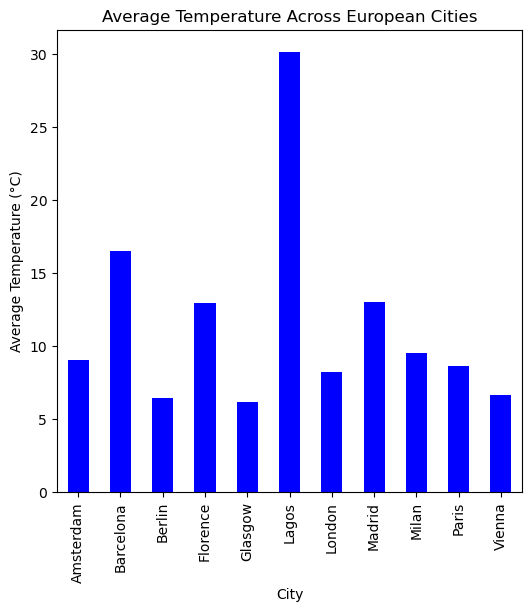

In [9]:
import matplotlib.pyplot as plt

avg_temp.plot(kind='bar', figsize=(6, 6), color='blue')
plt.title("Average Temperature Across European Cities")
plt.xlabel("City")
plt.ylabel("Average Temperature (°C)")
plt.show()


The bar chart titled "Average Temperature Across European Cities" represents the average temperatures (in degrees Celsius) recorded across various cities in Europe.

> The x-axis lists the names of the cities included in the analysis (e.g., Amsterdam, Barcelona, Berlin, etc.).
> The y-axis represents the average temperature for each city, measured in degree Celsius.

Inference:

- Most cities (e.g., Berlin, Vienna, and Paris) cluster around moderate temperatures, between 5°C and 15°C.
- Warmer regions, like Barcelona and Madrid, have slightly higher average temperatures (above 15°C), which aligns with the southern European locations.
- Northern European cities like Glasgow and Amsterdam show lower average temperatures.
- Unusual spike: Lagos shows an unusual spike in the bar graph having average temperature of 30.12°C.
  This unusual value can effect further analysis so its important to find outliers in the data set.


Outliers are data points that significantly differ from the remainder of the dataset. They could be caused by data variability, measurement errors, or unusual situations. Finding and controlling outliers is essential to accurate statistical analysis.

Here, I've applied the Interquartile Range (IQR) approach to determine whether the European data set has any outliers. The range between the 25th percentile (Q1) and the 75th percentile (Q3) is used to compute the IQR. An outlier is any data point which lies outside the range of 1.5 times of the IQR. 

It has been further represented visually using a Boxplot.

Lower Bound: -0.8224999999999989
Upper Bound: 21.237499999999997
Outliers: [30.12]


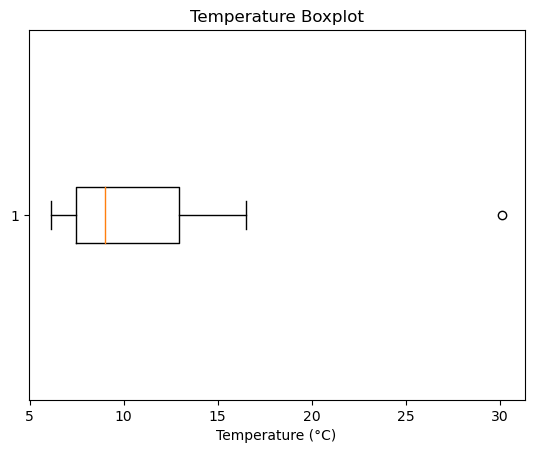

In [10]:
import numpy as np

# Data: Average temperatures of european cities
temperatures = [9.01, 16.48, 6.47, 12.92, 6.14, 30.12, 8.23, 13.01, 9.53, 8.65, 6.67] 

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(temperatures, 25)  # 25th percentile
Q3 = np.percentile(temperatures, 75)  # 75th percentile
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [temp for temp in temperatures if temp < lower_bound or temp > upper_bound]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", outliers)



import matplotlib.pyplot as plt

plt.boxplot(temperatures, vert=False)
plt.title("Temperature Boxplot")
plt.xlabel("Temperature (°C)")
plt.show()


- A list of average temperatures for several European cities is defined at the beginning of the code. The code determines     the first quartile (Q1) and the third quartile (Q3), which stand for the 25th and 75th percentiles of the data   respectively, using the numpy module. The difference between Q3 and Q1 is used to calculate the interquartile range (IQR).

- Following that, it uses the formula 1.5 * IQR below Q1 and above Q3 to determine the bottom and upper boundaries for finding outliers.

- Any temperature data point which deviates from this range is regarded as outlier.

- We can clearly see that 30.12 is out of this range and hence is an outlier in this data set.
- This temperature is associated with the city of Lagos.

Reason for this inconsistency can be because of wrong data. Lagos is a city in Nigeria which is part of Africa. But the way timezone has been mapped with continents, it fell under Europe. This caused the inconsistency in the data set.

Elliminating the outlier and calculating the mean temperature again.

In [11]:
df_europe = df[df['Continent'] == 'Europe'].copy()

# Safely drop the row where the 'City' is "Logos"
df_europe = df_europe.drop(df_europe[df_europe['City'] == "Lagos"].index)

avg_temp = df_europe.groupby('City')['Temperature (°C)'].mean().round(2)
print(avg_temp)


City
Amsterdam     9.01
Barcelona    16.48
Berlin        6.47
Florence     12.92
Glasgow       6.14
London        8.23
Madrid       13.01
Milan         9.53
Paris         8.65
Vienna        6.67
Name: Temperature (°C), dtype: float64


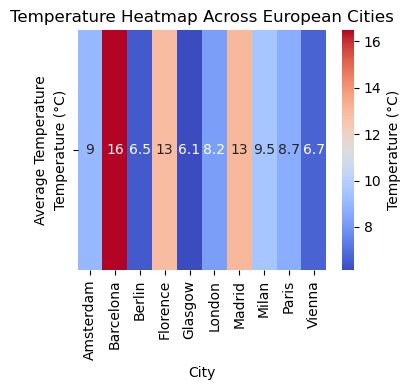

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame for cities and their average temperatures (if not already done)
city_avg_temp = avg_temp.reset_index()

# Create a pivot table (if you have additional columns for cities and countries)
# For simplicity, we'll just use the avg_temp directly
city_avg_temp_pivot = city_avg_temp.set_index('City')

# Plot the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(city_avg_temp_pivot.T, annot=True, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Temperature Heatmap Across European Cities")
plt.ylabel("Average Temperature")
plt.tight_layout()
plt.show()

The provided code creates a heatmap to illustrate the average temperatures of European cities using seaborn and matplotlib. With cities as rows and their average temperatures as columns, the city_avg_temp DataFrame is reset and converted into a pivot table for the data preparation process. 
Then, using sns.heatmap(), the heatmap is created. The color scheme (coolwarm) depicts temperature gradients, with warmer hues for higher temperatures and cooler hues for lower ones.

- Warmer cities, like Barcelona (16°C), are represented in red, while cooler cities, such as Glasgow (6.8°C) and Amsterdam (9°C), are depicted in shades of blue
- The gradient effectively conveys the contrast between warm and cold regions, making it easy to identify temperature trends at a glance.

The code below creates a pie chart to visualize the percentage of days these European cities received rainfall versus days without any rain.

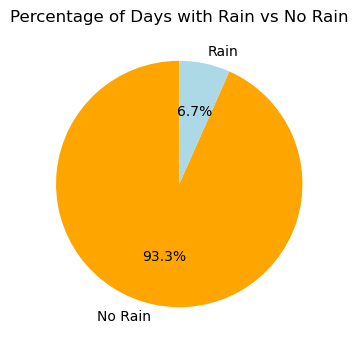

In [13]:
df_europe['Rain Status'] = df_europe['Precipitation (mm)'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')

# Calculate percentages
rain_counts = df_europe['Rain Status'].value_counts()
labels = rain_counts.index
sizes = rain_counts.values

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
plt.title('Percentage of Days with Rain vs No Rain')
plt.show()


- It first creates a new column, 'Rain Status', by applying a lambda function to the 'Precipitation (mm)' column, where days with precipitation greater than 0 mm are labeled as "Rain" and those with 0 mm or less as "No Rain". The value_counts() function counts the occurrences of each status, and these counts are used to determine the sizes and labels for the pie chart.

- Using plt.pie(), the chart is created with custom colors and formatted percentage labels. 

Most European cities in the dataset are expected to have a mild, temperate climate overall, with dry conditions predominating the weather pattern, as indicated by the low percentage of wet days by the pie chart and the moderate to cold temperature as represented in the heatmap. Cooler cities like Glasgow may lean toward a dry and colder climate, while warmer cities like Barcelona may be more linked with mediterranean climates.

### Weather Analysis of Asia

In the first step, I filter out the cities of the continent Asia

In [14]:
import pandas as pd
# Filter out cities in Asia
df_asia = df[df["Continent"] == "Asia"]

# Display the filtered DataFrame
print(df_asia)


           Date      City Country  Timezone  Temperature (°C)  \
3    11-11-2024     Tokyo      JP       9.0             17.19   
4    11-11-2024     Delhi      IN       5.5             28.05   
7    11-11-2024    Mumbai      IN       5.5             29.99   
8    11-11-2024     Kabul      AF       4.5             14.10   
11   11-11-2024   Kolkata      IN       5.5             27.97   
..          ...       ...     ...       ...               ...   
848  20-11-2024     Dubai      AE       4.0             30.23   
850  20-11-2024     Seoul      KR       9.0              8.19   
852  20-11-2024     Kyoto      JP       9.0             14.11   
858  20-11-2024     Ciaro      ID       7.0             29.23   
862  20-11-2024  Kharghar      IN       5.5             30.99   

     Temperature (°F)  feels_Like (°C)  Humidity (%)  Precipitation (mm)  \
3               62.94            16.53          60.0                 0.0   
4               82.49            29.20          57.0               

> Finding the mean temperature, precipitation and humidity across multiple the cities in Asia. This will help in the analysis of how the weather varies accross the continent.

In [15]:
avg_temp_asia = df_asia.groupby('City')['Temperature (°C)'].mean().round(2)
avg_precipitaion = df_asia.groupby('City')['Precipitation (mm)'].mean().round(2)
avg_humidity = df_asia.groupby('City')['Humidity (%)',].mean().round(2)

print(avg_temp_asia,avg_precipitaion,avg_humidity)

City
Ciaro       25.57
Delhi       24.85
Dubai       30.64
Kabul       12.07
Kharghar    31.29
Kolkata     27.47
Kyoto       15.48
Mumbai      31.29
Seoul       10.24
Tokyo       15.62
Name: Temperature (°C), dtype: float64 City
Ciaro       0.08
Delhi       0.00
Dubai       0.00
Kabul       0.00
Kharghar    0.00
Kolkata     0.00
Kyoto       0.28
Mumbai      0.00
Seoul       0.00
Tokyo       0.23
Name: Precipitation (mm), dtype: float64           Humidity (%)
City                  
Ciaro            87.33
Delhi            53.80
Dubai            44.10
Kabul            33.30
Kharghar         43.60
Kolkata          53.30
Kyoto            78.40
Mumbai           44.00
Seoul            64.70
Tokyo            68.64


Before ploting any graph, we can find if there are any outliers in the dataset. Outliers badly effect the mean of the dataset and give erroneus results. 

Lower Bound: -5.983750000000001
Upper Bound: 51.34625
Outliers: []


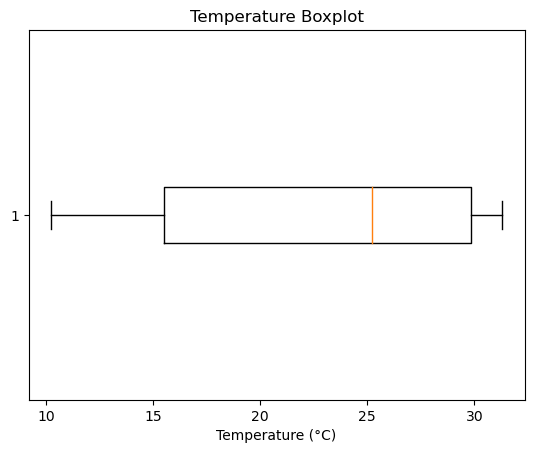

In [99]:
import numpy as np

# Data: Average temperatures of cities
temperatures = [25.57, 24.85, 30.64, 12.07, 31.29, 27.47, 15.48, 31.29, 10.24, 15.62] 

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(temperatures, 25)  # 25th percentile
Q3 = np.percentile(temperatures, 75)  # 75th percentile
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [temp for temp in temperatures if temp < lower_bound or temp > upper_bound]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", outliers)



import matplotlib.pyplot as plt

plt.boxplot(temperatures, vert=False)
plt.title("Temperature Boxplot")
plt.xlabel("Temperature (°C)")
plt.show()


From the above boxplot, we can conclude that there are no outliers. So we can move ahead with the analysis.

Plotting a histogram to analyze the temperature trend across various cities of Asia.

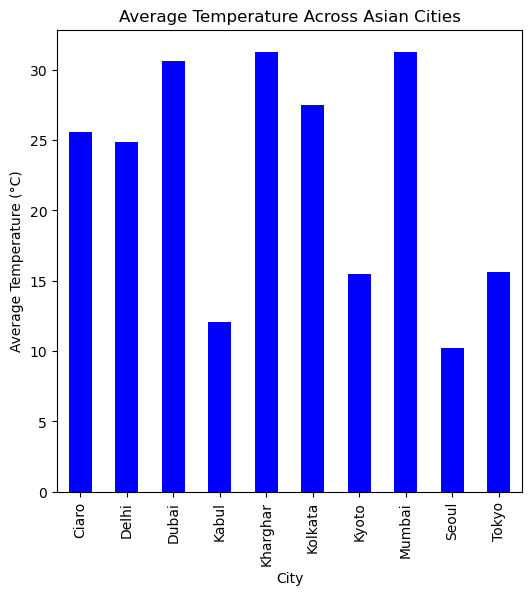

In [100]:
import matplotlib.pyplot as plt

avg_temp_asia.plot(kind='bar', figsize=(6, 6), color='blue')
plt.title("Average Temperature Across Asian Cities")
plt.xlabel("City")
plt.ylabel("Average Temperature (°C)")
plt.show()

The graph provides a clear comparison of temperature variations across different cities, helping identify hot and cooler regions in Asia.

> Cities like Dubai, Kharghar, and Mumbai appear to have the highest average temperatures (above 30°C) whereas cities such as Kabul and Seoul have noticeably lower average temperatures, likely below 20°C.


#### Heatmap

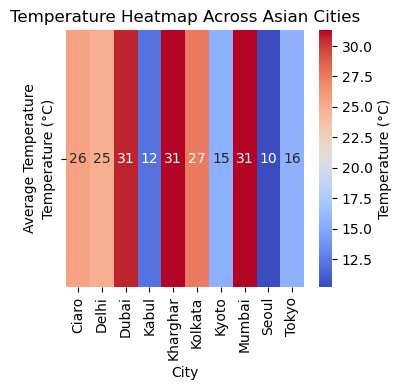

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a dataframe for cities and their average temperatures
city_avg_temp = avg_temp_asia.reset_index()

# Create a pivot table 
city_avg_temp_pivot = city_avg_temp.set_index('City')

# Plot the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(city_avg_temp_pivot.T, annot=True, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Temperature Heatmap Across Asian Cities")
plt.ylabel("Average Temperature")
plt.tight_layout()
plt.show()


Heatmaps use a color gradient to represent data values, making it easy to spot patterns, trends, and outliers rapidly. A color-coded cell representing the average temperatures for a number of Asian cities shows warmer (higher) temperatures in red hues and cooler (lower) temperatures in blue shades.

Deep red cells indicate cities with temperatures of about 31°C, such as Mumbai, Kolkata, Dubai, and Kharghar. 
It is evident that these cities have high average temperatures, which is probably a sign of warmer climate or tropical conditions. Kyoto and Seoul, which are depicted with lighter blue hues, with temperatures of 10°C and 16°C, respectively, indicating colder climates.
With typical temperatures that range from 25°C to 16°C and are depicted in orange and light blue hues, Cairo, Delhi, and Tokyo are in the middle range.

The heatmap highlights the diversity in climates across Asian cities, from arid desert like conditions of Dubai to temperate regions of Seoul and Kyoto.
Cities such as Kolkata and Mumbai have almost identical temperatures, showing geographical or climatic similarities.

As the data has been collected for the month of November, the temperature is expected to fall. However there are cities which show relatively high temperature indicating tropical climate and not so colder winter days.



### Humidity and Precipitation Relationships:


> How does the level of humidity impact the likelihood of precipitation?

> How do different weather metrics influence the occurrence of specific weather conditions across cities in Asia?

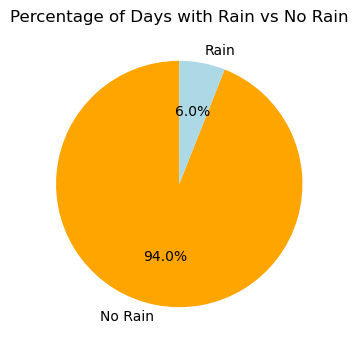

In [29]:
df_asia['Rain Status'] = df_asia['Precipitation (mm)'].apply(lambda x: 'Rain' if x > 0 else 'No Rain')
# Calculate percentages
rain_counts = df_asia['Rain Status'].value_counts()
labels = rain_counts.index
sizes = rain_counts.values

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
plt.title('Percentage of Days with Rain vs No Rain')
plt.show()


- It first creates a new column, 'Rain Status', by applying a lambda function to the 'Precipitation (mm)' column, where days with precipitation greater than 0 mm are labeled as "Rain" and those with 0 mm or less as "No Rain". The value_counts() function counts the occurrences of each status, and these counts are used to determine the sizes and labels for the pie chart.

- Using plt.pie(), the chart is created with custom colors and formatted percentage labels. 

- The pie chart illustrates the distribution of days with Rain and No Rain. rain accounts to only 6% of the days suggesting  weather during the month of November is peredominantly dry.

Further exploratory analysis will help us understand the weather condition and the relationship between precipitaion, humidity and temperature. 

                    Temperature (°C)  Precipitation (mm)  Humidity (%)
Temperature (°C)            1.000000           -0.195821     -0.231573
Precipitation (mm)         -0.195821            1.000000      0.273699
Humidity (%)               -0.231573            0.273699      1.000000


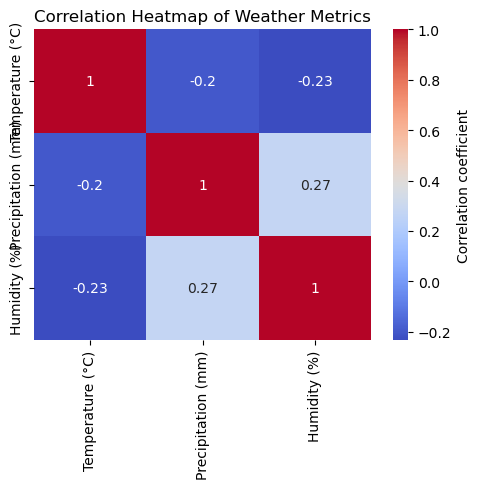

In [28]:
# Assuming 'df' includes additional columns like 'Precipitation (mm)', 'Humidity (%)', etc.
correlation = df_asia[['Temperature (°C)', 'Precipitation (mm)', 'Humidity (%)']].corr()
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation Heatmap of Weather Metrics")
plt.tight_layout()
plt.show()

#### Analysis of the Co-relation Matrix:

We can infer the following information regarding the relationships between temperature (°C), precipitation (mm), and humidity (%) from this correlation matrix.

The variables show weak correlations with each other, meaning they are relatively independent but not completely unrelated.

1. Temperature vs. Precipitation (-0.195821): Temperature vs. Precipitation (-0.195821): The weakly negative correlation indicates that there is a minor relationship between lower precipitation and higher temperature. The association isn't solid enough, though, to make firm assertions. This could suggest that precipitation and temperature are generally independent, however they might interact in certain situations, like hot, dry weather.

2. Precipitation vs. Humidity (0.273699): The weakly positive relationship between precipitation and humidity (0.273699) indicates that there is a correlation between the two. This is logical, as precipitation occurs when atmospheric humidity reaches a high threshold and then condensation leading to rainfall. While the relationship is positive, its weakness indicates that other factors also influence precipitation.

3. Temperature vs. Humidity (-0.231573): The weak negative correlation suggests that humidity tends to gradually decrease as temperature rises. The small correlation, however, suggests that humidity may also be greatly influenced by other factors.

These weak correlations suggest that the relationships among temperature, precipitation, and humidity are intricate and could be influenced by other variables such as wind, atmospheric pressure, or location. Although these correlations offer some useful information, they are insufficient to forecast a single variable from another. To further understand the dynamics, more research or data may be required.


***Are there weather conditions where high humidity is observed but no precipitation occurs?***

Correlation between Humidity and Precipitation:
                     Humidity (%)  Precipitation (mm)
Humidity (%)            1.000000            0.273699
Precipitation (mm)      0.273699            1.000000


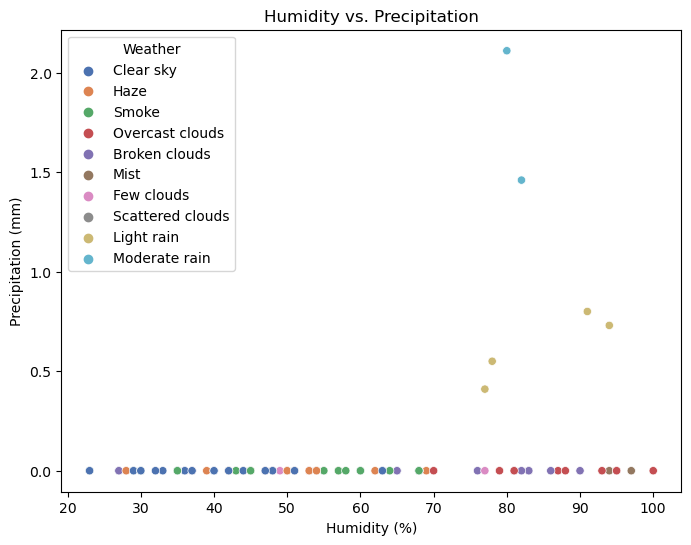

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between Humidity and Precipitation
correlation = df_asia[["Humidity (%)", "Precipitation (mm)"]].corr()
print("Correlation between Humidity and Precipitation:\n", correlation)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_asia, x="Humidity (%)", y="Precipitation (mm)", hue="Weather", palette="deep")
plt.title("Humidity vs. Precipitation")
plt.xlabel("Humidity (%)")
plt.ylabel("Precipitation (mm)")
plt.show()

- High Humidity with Minimal or No Precipitation

One of the most striking patterns in the data is the occurrence of high humidity levels (greater than 80%) with little to no precipitation recorded. 
Weather conditions such as overcast clouds, haze, and mist dominate these regions of the plot. These situations suggest that while the air is saturated or nearly saturated with moisture, other critical conditions are required for rain to occur.

- Events of precipitaion

Precipitation in the dataset predominantly occurs under weather conditions such as light rain and moderate rain. 
These events are associated with high humidity levels (above 80%). However, as seen previously, even within the high humidity range, not all data points exhibit precipitation, reinforcing the idea that high humidity alone is not a sufficient condition for rain.


- Low and Moderate Humidity

Humidity less than 50%, no precipitaion is recorded in this range. Weather conditions here include clear skies, smoke, few clouds, 
and scattered clouds, which are typically associated with dry air. With moderate humidity ranging between 50-80%, conditions like mist 
and overcast clouds become more frequent. 


A statistical analysis of the correlation coefficient between Humidity (%) and Precipitation (mm) further explains this relationship. 
A positive but not perfect correlation indicates that while higher humidity increases the likelihood of precipitation, it is not the sole determinant.
A weak or moderate correlation suggests that other factors—such as atmospheric pressure, wind patterns, and cloud types—play a significant role in the
occurrence of rain.


***How does the level of humidity impact the likelihood of precipitaion.***

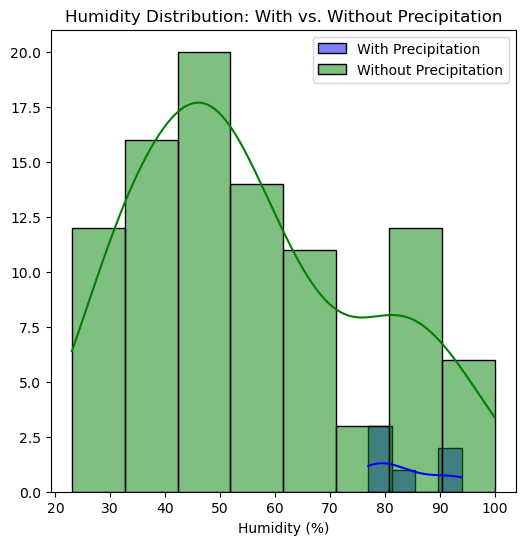

In [108]:
# Histogram: Humidity distribution with and without precipitation
plt.figure(figsize=(6, 6))
sns.histplot(df_asia[df_asia["Precipitation (mm)"] > 0]["Humidity (%)"], kde=True, color="blue", label="With Precipitation")
sns.histplot(df_asia[df_asia["Precipitation (mm)"] == 0]["Humidity (%)"], kde=True, color="green", label="Without Precipitation")
plt.title("Humidity Distribution: With vs. Without Precipitation")
plt.xlabel("Humidity (%)")
plt.ylabel("")
plt.legend()
plt.show()

The frequency distribution of humidity levels across the dataset and the occurrence of precipitation are represented by the histogram: Humidity distribution with and without precipitation.

The density plot and histogram examine the connection between precipitation and humidity levels. The humidity distribution on days without any precipitation is shown by the green bars, and the days with precipitation is shown by the blue bars. The distribution of days without precipitation is wider, peaking at 50–60% humidity. On the other hand, days having rainfall are concentrated at higher humidity levels (80–100%), suggesting that more humid circumstances are conducive to precipitaion.

Correlation Analysis: 

There is a somewhat positive association between humidity and precipitation, as indicated by the correlation coefficient of 0.27. Although there is a little increase in the likelihood of precipitation with higher humidity, the correlation is not strong enough to accurately predict the other. 
This indicates that although humidity plays a role in the possibility of rainfall, it is not the sole determinant. Rainfall is also significantly influenced by other meteorological factors, such as air pressure, temperature differential, wind speed, etc.

- Low Humidity (< 50%): In this scenario, precipitation is rare, indicating that dry air is generally not conducive to rain formation.

- Moderate Humidity (50–70%): Here, some instances of precipitation occur, but the likelihood is still low, pointing to additional dependencies like temperature and wind conditions.

- High Humidity (> 80%): In conditions of high humidity precipitation becomes more frequent, though not guaranteed, which aligns with the idea that high atmospheric moisture provides the raw material for rain but needs dynamic processes (e.g., rising air) to convert it into rainfall.

### Wind Speed and Weather Dynamics:

Here we try to study what effect wind speed has on the weather. 

The scatter plot titled "Wind Speed vs. Temperature Across Weather Conditions" provides an overview of the relationship between wind speed (in m/s) and temperature (in °C), categorized by various weather conditions.

In [21]:
# Average Wind Speed by Weather Condition
avg_wind_speed = df.groupby("Weather")["Wind Speed (m/s)"].mean().sort_values()
print("Average Wind Speed by Weather Condition:\n", avg_wind_speed)



Average Wind Speed by Weather Condition:
 Weather
Mist                           1.708750
Haze                           2.160667
Light intensity drizzle        2.397500
Overcast clouds                2.820635
Smoke                          3.013571
Light rain                     3.115385
Scattered clouds               3.216923
Clear sky                      3.323563
Moderate rain                  3.861667
Few clouds                     3.902917
Broken clouds                  3.951552
Fog                            4.120000
Light intensity shower rain    6.173333
Name: Wind Speed (m/s), dtype: float64


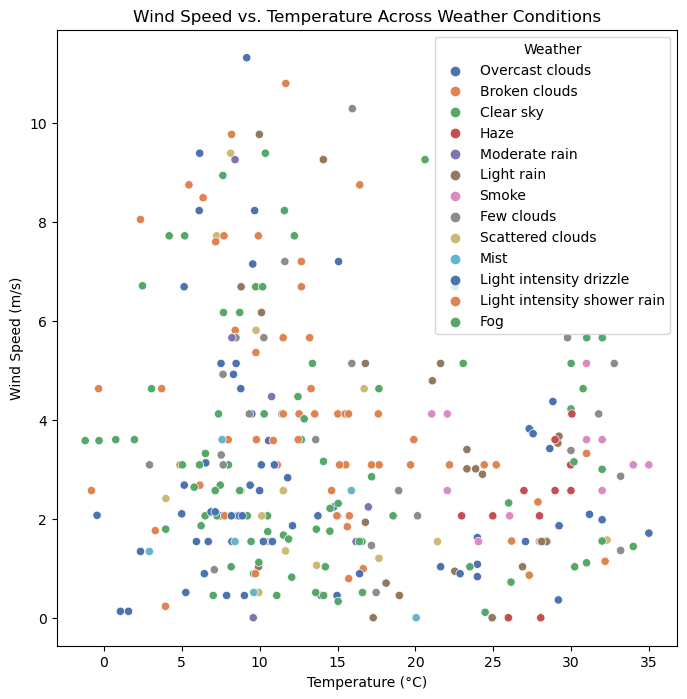

In [23]:
# Scatter plot: Wind Speed vs. Temperature
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Temperature (°C)", y="Wind Speed (m/s)", hue="Weather", palette="deep")
plt.title("Wind Speed vs. Temperature Across Weather Conditions")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.show()

Weather types like Overcast Clouds and Light Rain often correlate with moderate wind speeds, possibly due to active weather systems. Clear Sky conditions show a wider variation in wind speeds, hinting at diverse atmospheric conditions.

**Temperature-Wind Speed Trends:**

> Higher temperatures (25°C–35°C): Higher temperature is predominantly associated with "Clear sky" and "Few clouds."
Wind speeds are moderately high in this range which suggest active atmospheric dynamics even under sunny or mildly cloudy conditions.

> Lower temperatures (0°C–15°C):Lower wind speeds dominate with weather types like "Mist" and "Overcast clouds". 
This is consistent with colder, more stable air masses.

> Specific Weather Conditions:

- ***Scattered Clouds and Mist:***
Scatered clouds and Mist is associated with calm, low-wind conditions.
These likely represent settled weather, where wind turbulence is minimal.

- ***Moderate Rain and Light Rain:***
Rainy conditions generally show higher wind speeds, which might be linked to weather systems like storms.

- ***Smoke and Haze:***
Smoke shows an average wind speed of 3.01 m/s, indicating significant air movement to spread smoke particles. Whereas Haze is slightly calmer with average wind speed of 2.16 m/s.

- ***Overcast and Broken Clouds:***
These intermediate cloud conditions span a broad range of temperatures and wind speeds.


**Can a combination of temperature, humidity, wind speed, and precipitation accurately predict specific weather conditions?**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Filter for cities in Asia and create a copy 
df_asia = df[df["Continent"] == "Asia"].copy()

# Drop rows with missing values
df = df.dropna(subset=["Temperature (°C)", "Humidity (%)", "Precipitation (mm)","Wind Speed (m/s)", "Weather"])

# Encode the target variable 'Weather'
label_encoder = LabelEncoder()
df["Weather_encoded"] = label_encoder.fit_transform(df["Weather"])

# Select features and target
X = df[["Temperature (°C)", "Humidity (%)", "Precipitation (mm)", "Wind Speed (m/s)"]]
y = df["Weather_encoded"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Train the Random FOrest Classifier
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("The accuracy of the Random Forest is:", accuracy_rf)





Model Accuracy: 0.44329896907216493
The accuracy of the Random Forest is: 0.5360824742268041


The above code uses machine learning to predict weather conditions based on features like temperature, humidity, precipitation, and wind speed. 
First, the dataset is filtered to include only cities in Asia, as we are trying to analyse and predict the weather for this continent. Any rows with missing values in the relevant columns are dropped. 
LabelEncoder has been used to convert target variable ***Weather*** into numerical values. The features (temperature, humidity, precipitation, wind speed) are separated into the variable X, and the encoded weather labels are stored in y. 
The data is then split into training set (70%) and testing (30%) 
A Decision Tree Classifier is trained on the training set, and predictions are made on the test set. 
Then, a Random Forest Classifier is trained and evaluated similarly. Finally, the accuracy of both models is calculated and printed, showing how well each model predicted the weather conditions in the test set.



### Limitations

Both the models show a low accuracy of 0.44 and 0.53 respectively. The relatively low accuracy values suggest that the model is not performing particularly well in predicting weather conditions based on the given features.
Probebel reason for the low accuracy might be a small data set. Since the data has been collected just for few days for the month of November, it can significantly affect the accuracy of the model. Since it captured data for a small time frame, the model would struggle to generalise and then predict different weather paterns. 

With a small data set, machine learning models like Random Forest may run on overfitting data. It will learn patens which are specific to the limited data it is trained on. This reduces the  ability to make accurate predictions. 

A small data set can also mean that the model has fewer examples to learn from. This results in underfitting where th emodel fails to capture the relationship between the features and the target variable. In such a scenario, the model cannot learn to recognise significant paterns.

Exploratory Analysis of weather is restricted to the continent of Europoe ans Asia. Project can extended further with analysis of rest of the continents. Collecting data for wider time period and including more features of weather can help in beter EDA. 

